In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('customer_churn.csv')
display(data.shape)
display(data.dtypes)
data.head()

(7043, 21)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
X = data[['tenure','SeniorCitizen','MonthlyCharges']]
y = data[['Churn']]

display(X.head())
y.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


,Churn
0,No
1,No
2,Yes
3,No
4,Yes


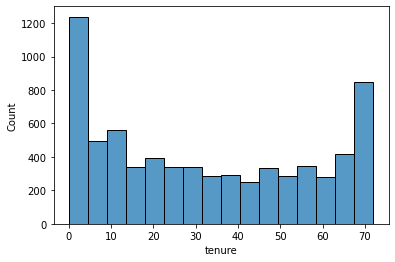

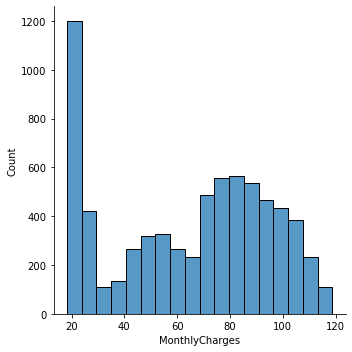

In [4]:
sns.histplot(data=data, x='tenure')
sns.displot(data=data, x='MonthlyCharges')
plt.show()

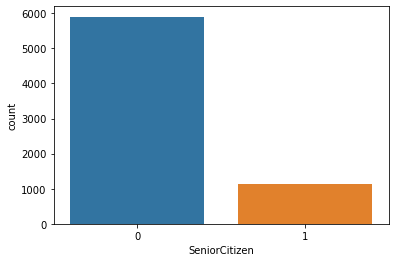

In [5]:
sns.countplot(data=data, x='SeniorCitizen')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train)
X_train_trans_np = transformer.transform(X_train)
X_train_norm = pd.DataFrame(X_train_trans_np,columns=X_train.columns,index=X_train.index)

X_test_trans_np = transformer.transform(X_test)
X_test_norm = pd.DataFrame(X_test_trans_np,columns=X_test.columns,index=X_test.index)

display(X_train_norm.head(10))
X_test_norm.head(10)

,tenure,SeniorCitizen,MonthlyCharges
2920,1.000000,0.0,0.665174
2966,0.194444,1.0,0.279602
6099,0.986111,0.0,0.064179
5482,0.458333,0.0,0.553731
2012,0.652778,0.0,0.800995
156,0.305556,0.0,0.655721
6562,0.194444,1.0,0.815423
1495,0.722222,0.0,0.795025
939,0.208333,0.0,0.016418
3631,0.013889,1.0,0.311443


,tenure,SeniorCitizen,MonthlyCharges
2200,0.263889,0.0,0.397512
4627,0.833333,0.0,0.978607
3225,0.180556,0.0,0.534328
2828,0.013889,0.0,0.021891
3768,0.763889,0.0,0.592040
4446,0.041667,1.0,0.613433
2234,0.319444,0.0,0.412438
5454,0.013889,1.0,0.510448
1278,0.500000,0.0,0.422388
578,0.486111,1.0,0.759204


In [10]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(y_train)
y_train_cat_np = encoder.transform(y_train).toarray()
y_train_cat = pd.DataFrame(y_train_cat_np,columns=encoder.get_feature_names_out(),index=y_train.index)

y_test_cat_np = encoder.transform(y_test).toarray()
y_test_cat = pd.DataFrame(y_test_cat_np,columns=encoder.get_feature_names_out(),index=y_test.index)

display(y_train_cat.head())
y_test_cat.head()

,Churn_Yes
2920,0.0
2966,0.0
6099,0.0
5482,1.0
2012,1.0


,Churn_Yes
2200,0.0
4627,0.0
3225,0.0
2828,0.0
3768,0.0


In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0,solver='lbfgs')
lr.fit(X_train_norm,y_train_cat)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_norm,y_test_cat)))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
y_pred_test = lr.predict(X_test_norm)
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test_cat,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test_cat,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test_cat,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test_cat,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test_cat,y_pred_test)))

The accuracy of the model in the TEST set is: 0.78
The accuracy in the TEST set is: 0.78
The precision in the TEST set is: 0.62
The recall in the TEST set is: 0.46
The F1 in the TEST set is: 0.53
The Kappa in the TEST set is: 0.39


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### The accuracy of the model is over 70% because the dependent variable is heavily skewed. The majority class has way more values than the minority. So the model is somewhat better at predicting the majority class but fails to predict the minority well. 

In [20]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=0,k_neighbors=3)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_norm,y_train_cat)

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_SMOTE,y_train_SMOTE)

y_pred_test = lr.predict (X_test_norm)
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test_cat,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test_cat,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test_cat,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test_cat,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test_cat,y_pred_test)))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.48
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.38


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


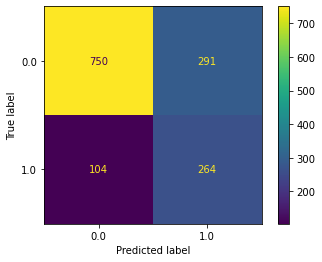

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test_cat,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

### The recall and F1 increase but the accuracy and precision drop. The Kappa scores remain similar. 